In [1]:
#!pip install matplotlib


In [2]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib
import matplotlib.pyplot as plt

In [3]:
data_frame = pd.read_csv('annotation_1.csv')#1

In [4]:
data_frame.rename(columns={'Имя классa':'class_name', 'Абсолютный путь': 'absolute_path'}, inplace=True)
df = data_frame.reindex(columns=['class_name', 'absolute_path'])
df#2

,class_name,absolute_path
0,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...
1,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...
2,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...
3,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...
4,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...
...,...,...
2006,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...
2007,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...
2008,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...
2009,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...


In [5]:
df['marker'] = 0
df.loc[df['class_name'] == 'brown bear', 'marker'] = 1
df.loc[df['class_name'] == 'polar bear', 'marker'] = 0
df#3

,class_name,absolute_path,marker
0,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...,0
1,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...,0
2,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...,0
3,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...,0
4,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...,0
...,...,...,...
2006,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...,1
2007,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...,1
2008,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...,1
2009,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...,1


In [6]:
width = list()
height = list()
channels = list()
pictures = df['absolute_path'].values[:]
for picture in pictures:
    if os.path.exists(str(picture)):
        img = cv2.imread(picture, cv2.IMREAD_COLOR)
        height.append(img.shape[0])
        width.append(img.shape[1])
        channels.append(img.shape[2])#4

In [7]:
df['width'] = width
df['height'] = height
df['channels_amount'] = channels
df#4

,class_name,absolute_path,marker,width,height,channels_amount
0,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...,0,1600,1067,3
1,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...,0,1500,1000,3
2,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...,0,1892,942,3
3,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...,0,1920,1272,3
4,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...,0,1280,847,3
...,...,...,...,...,...,...
2006,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...,1,4256,2832,3
2007,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...,1,1000,666,3
2008,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...,1,1600,1067,3
2009,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...,1,2048,1152,3


In [8]:
brown_medium_width = df.loc[df['marker']==1, 'width'].mean()
polar_medium_width = df.loc[df['marker']==0, 'width'].mean()
brown_medium_height = df.loc[df['marker']==1, 'height'].mean()
polar_medium_height = df.loc[df['marker']==1, 'height'].mean()
brown_medium_width, polar_medium_width, brown_medium_height, polar_medium_height#5

(1830.909090909091, 1780.4443319838056, 1304.3567937438904, 1304.3567937438904)

In [9]:
def one_class(dataframe: pd.DataFrame, label: int):
    new_dataframe = dataframe[df['marker']==label]
    new_dataframe.index = range(new_dataframe.shape[0])
    return new_dataframe#6

In [10]:
df_brown = one_class(df, 1)
df_polar = one_class(df, 0)#6

In [11]:
def width_height_sort(max_height: int, max_width: int, df: pd.DataFrame, label: int):
    new_dataframe = df[df['marker']==label]
    new_dataframe = new_dataframe[  (  (new_dataframe['width']<=max_width) & (new_dataframe['height']<=max_height) )  ]
    new_dataframe.index = range(new_dataframe.shape[0])
    return new_dataframe#7

In [12]:
df1_min = width_height_sort(1000, 1500, df, 1)
df2_min = width_height_sort(1300, 1700, df, 1)#7

In [13]:
df['pixels'] = df['width']*df['height']*df['channels_amount']
df#8

,class_name,absolute_path,marker,width,height,channels_amount,pixels
0,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...,0,1600,1067,3,5121600
1,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...,0,1500,1000,3,4500000
2,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...,0,1892,942,3,5346792
3,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...,0,1920,1272,3,7326720
4,polar bear,/home/cossieman2000/WORK/python/dataset/polar ...,0,1280,847,3,3252480
...,...,...,...,...,...,...,...
2006,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...,1,4256,2832,3,36158976
2007,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...,1,1000,666,3,1998000
2008,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...,1,1600,1067,3,5121600
2009,brown bear,/home/cossieman2000/WORK/python/dataset/brown ...,1,2048,1152,3,7077888


In [14]:
max_pixels = df['pixels'].max()
min_pixels = df['pixels'].min()
mean_pixels = df['pixels'].mean()
max_pixels, min_pixels, mean_pixels#8

(146546688, 180000, 9076884.013426157)

In [21]:
def Histograme (df: pd.DataFrame, marker: int):
    image = cv2.imread((df[df['marker']==marker].sample())['absolute_path'].values[0])
    color = ('b', 'g', 'r')
    lines = list(range(3))
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        lines[i] = histr
    return lines[0], lines[1], lines[2]

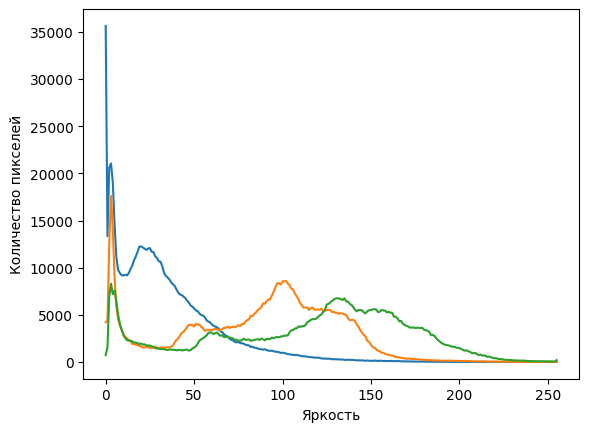

In [26]:
b, g, r = Histograme(df, 1)
fig, ax = plt.subplots()
ax.plot(b)
ax.plot(g)
ax.plot(r)
ax.set_xlabel('Яркость')
ax.set_ylabel('Количество пикселей')
plt.show()